In [ ]:
import pandas as pd

df = pd.read_csv("CCEE_BR_Data.csv")
print(df) 

# 1. Limpeza e pré-processamento ------------------------------------------- 

In [19]:
#Converter a coluna de datas
df['Data'] = pd.to_datetime(df['Data'], dayfirst=True, format='%d/%m/%Y') 


In [20]:
#Renomear colunas pra facilitar
df = df.rename(columns={
    'Classe': 'classe_consumidor',
    'Ramo': 'ramo_atividade',
    'Submercado': 'regiao',
    'UF': 'estado',
    'Consumo': 'consumo_mwh',
    'Covid': 'indicador_covid'
})


In [ ]:
#Verificar valores nulos e tipos
print(df.info())
print(df.isnull().sum())


In [22]:
#Criar colunas auxiliares Ano e mês, pra agregar facilmente:
df['ano']  = df['Data'].dt.year
df['mes']  = df['Data'].dt.month


In [23]:
# 3) Primeiras linhas para conferir se as colunas foram criadas/renomeadas
df.head()

,Data,classe_consumidor,ramo_atividade,regiao,estado,consumo_mwh,indicador_covid,ano,mes
0,2018-07-01,Autoprodutor,ALIMENTÍCIOS,NORDESTE,PE,0.01,0,2018,7
1,2018-07-01,Autoprodutor,ALIMENTÍCIOS,SUDESTE / CENTRO-OESTE,MG,0.00,0,2018,7
2,2018-07-01,Autoprodutor,ALIMENTÍCIOS,SUDESTE / CENTRO-OESTE,MT,0.68,0,2018,7
3,2018-07-01,Autoprodutor,ALIMENTÍCIOS,SUL,SC,1.88,0,2018,7
4,2018-07-01,Autoprodutor,ALIMENTÍCIOS,SUL,RS,0.04,0,2018,7


In [ ]:
# 2. Análise Exploratória (EDA)  ----------------------------------------------------
#Resumo estatístico do consumo
df['consumo_mwh'].describe()


count    418611.000000
mean        106.361081
std         580.168023
min           0.000000
25%           1.620000
50%           6.720000
75%          30.255000
max       14173.800000
Name: consumo_mwh, dtype: float64

In [27]:
#Consumo total por ano
consumo_anual = df.groupby('ano')['consumo_mwh'].sum().reset_index()
print(consumo_anual)


    ano  consumo_mwh
0  2018  11345994.23
1  2019  22822383.79
2  2020  10355540.65


In [28]:
#Consumo médio por mês (tendência sazonal)
sazonal = df.groupby('mes')['consumo_mwh'].mean().reset_index()
print(sazonal)


    mes  consumo_mwh
0     1   113.556711
1     2   111.815968
2     3   106.600543
3     4    99.813776
4     5    97.738011
5     6    97.608845
6     7   104.840896
7     8   105.418091
8     9   107.881777
9    10   111.143795
10   11   110.454149
11   12   107.986851


In [29]:
#Top 5 estados por consumo anual
top_estados = df.groupby(['ano','estado'])['consumo_mwh'].sum() \
                .reset_index() \
                .sort_values(['ano','consumo_mwh'], ascending=[True, False]) \
                .groupby('ano').head(5)
print(top_estados)


     ano estado  consumo_mwh
24  2018     SP   3048861.99
10  2018     MG   1312072.33
18  2018     RJ   1027443.01
17  2018     PR    709920.99
21  2018     RS    693277.43
50  2019     SP   6104427.98
36  2019     MG   2599000.04
44  2019     RJ   2153775.39
43  2019     PR   1425951.51
47  2019     RS   1407156.05
76  2020     SP   2716736.28
62  2020     MG   1161181.07
70  2020     RJ    973657.69
73  2020     RS    660567.84
69  2020     PR    654189.18


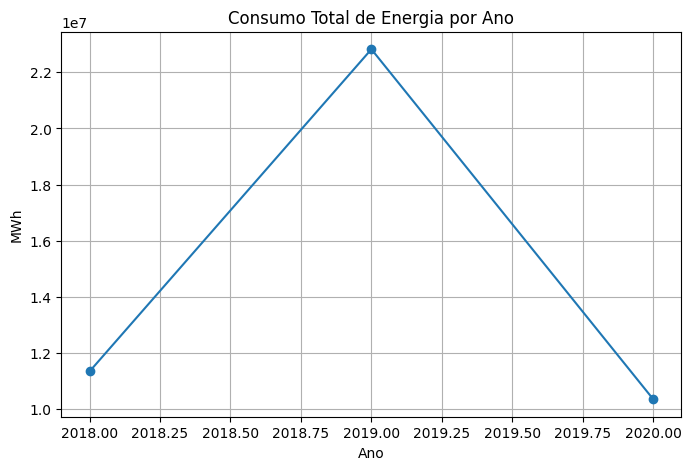

In [30]:
# 3.Primeiros Gráficos ---------------------------------------------
#Linha: consumo total ao longo dos anos
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(consumo_anual['ano'], consumo_anual['consumo_mwh'], marker='o')
plt.title('Consumo Total de Energia por Ano')
plt.xlabel('Ano')
plt.ylabel('MWh')
plt.grid(True)
plt.show()


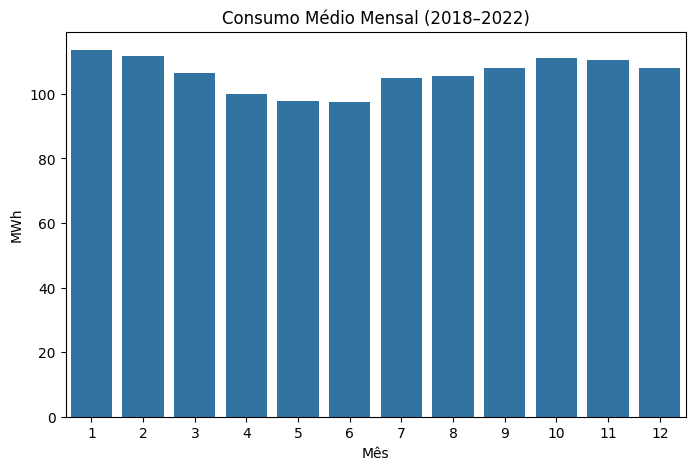

In [31]:
#Barplot: média de consumo por mês
import seaborn as sns
plt.figure(figsize=(8,5))
sns.barplot(x='mes', y='consumo_mwh', data=sazonal)
plt.title('Consumo Médio Mensal (2018–2022)')
plt.xlabel('Mês')
plt.ylabel('MWh')
plt.show()


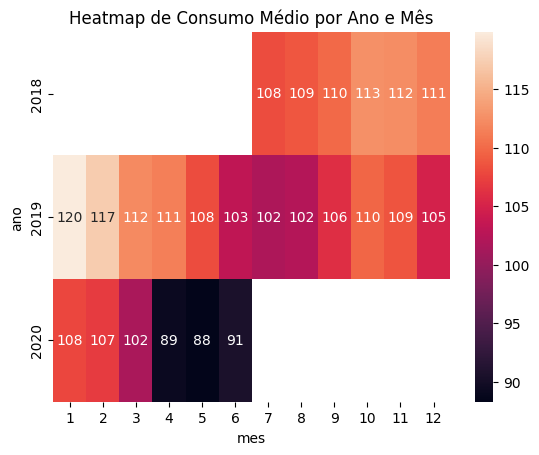

In [32]:
# Heatmap sazonal
pivot = df.pivot_table(index='ano', columns='mes', values='consumo_mwh', aggfunc='mean')
sns.heatmap(pivot, annot=True, fmt=".0f")
plt.title('Heatmap de Consumo Médio por Ano e Mês')
plt.show()


In [ ]:
# 4. Próximos Passos rumo ao Dashboard ------------------------- 
